In [2]:
import pandas as pd
#对50万样本随机采样3万
data = pd.read_csv("/data/fjsdata/mathV.csv",sep='|',low_memory=False)
data = data.fillna(0)#填补空值为零
print(data.shape)
#data = data.dropna(axis=0,how='any')
data=data.sample(n=23000)#随机采样5万
data.to_csv("/data/fjsdata/medV2W.csv",index=False,sep='|')
print(data.shape)

(542340, 3586)
(23000, 3586)


In [7]:
#BSR：MCMC+采样次数3000
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Uniform('beta', lower=0,upper=1, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    start=pm.find_MAP()  # 参数初猜
    step = pm.Metropolis()#多分类采样#step = pm.NUTS()连续采样
    trace = pm.sample(1000,start=start,step=step,chains=2,cores=2)

#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('Number')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(23000, 3586)


/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -6,509.4, ||grad|| = 0.43024: 100%|██████████| 379/379 [04:08<00:00,  1.53it/s] 
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 3000/3000 [18:53<00:00,  1.36draws/s]


<Figure size 640x480 with 1 Axes>

100%|██████████| 2000/2000 [11:48<00:00,  3.06it/s]

测试集准确率：0.845870
Complete time: 2195.377293 s


(23000, 3586)


/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -6,477.3, ||grad|| = 0.093424: 100%|██████████| 252/252 [02:48<00:00,  1.50it/s] 
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 11000/11000 [1:06:34<00:00,  1.36draws/s]


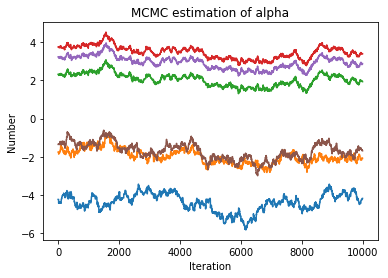

100%|██████████| 10000/10000 [56:11<00:00,  3.35it/s] 


测试集准确率：0.836739
Complete time: 7903.220118 s


In [9]:
#BSR：MCMC+采样次数10000
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Uniform('beta', lower=0,upper=1, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    start=pm.find_MAP()  # 参数初猜
    step = pm.Metropolis()#多分类采样#step = pm.NUTS()连续采样
    trace = pm.sample(5000,start=start,step=step,chains=2,cores=2)

#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('Number')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(23000, 3586)


Average Loss = 12,976: 100%|██████████| 10000/10000 [1:21:09<00:00,  2.09it/s]  
Finished [100%]: Average Loss = 13,016


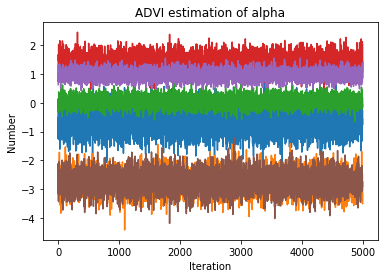

100%|██████████| 5000/5000 [28:40<00:00,  2.92it/s]

测试集准确率：0.835435
Complete time: 8049.188475 s


In [8]:
#BSR：ADVI+采样次数10000
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    inference = pm.ADVI()
    approx = pm.fit(n=10000, method=inference)
    trace = approx.sample(draws=5000)
#pm.summary(trace['alpha'])
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('Number')
plt.title('ADVI estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(23000, 3586)


Average Loss = 13,684: 100%|██████████| 30000/30000 [3:51:22<00:00,  1.99it/s]  
Finished [100%]: Average Loss = 13,714


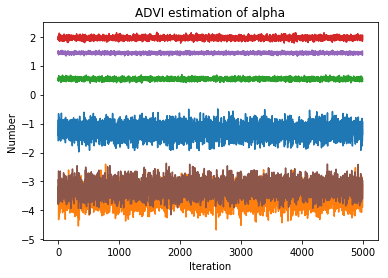

100%|██████████| 5000/5000 [29:57<00:00,  2.77it/s]  

测试集准确率：0.833696
Complete time: 17145.316257 s


In [10]:
#BSR：ADVI+采样次数30000
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    inference = pm.ADVI()
    approx = pm.fit(n=30000, method=inference)
    trace = approx.sample(draws=5000)
#pm.summary(trace['alpha'])
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('Number')
plt.title('ADVI estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

In [3]:
#LR
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
start = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.lr多分类
clf = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train,Y_train)
#4.预测
Y_pred= clf.predict(X_test)
print ('测试集准确率：%f'% accuracy_score(Y_test, Y_pred))
end = time.time()
print ("Complete time: %f s" % (end - start))

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(23000, 3586)
测试集准确率：0.845652
Complete time: 63.820823 s


In [4]:
#MLP
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
start = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.多分类
clf = MLPClassifier(hidden_layer_sizes=(100,100,100),solver='sgd').fit(X_train,Y_train)
#4.预测
Y_pred= clf.predict(X_test)
print ('测试集准确率：%f'% accuracy_score(Y_test, Y_pred))
end = time.time()
print ("Complete time: %f s" % (end - start))

(23000, 3586)
测试集准确率：0.852391
Complete time: 113.771296 s


In [5]:
#DT
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
start = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.决策树分类
clf = DecisionTreeClassifier().fit(X_train,Y_train)
#4.预测
Y_pred= clf.predict(X_test)
print ('测试集准确率：%f'% accuracy_score(Y_test, Y_pred))
end = time.time()
print ("Complete time: %f s" % (end - start))

(23000, 3586)
测试集准确率：0.835217
Complete time: 22.290602 s


In [6]:
#LGBM
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import time
start = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/medV2W.csv",sep='|',low_memory=False)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
train_data=lgb.Dataset(X_train,label=Y_train)
validation_data=lgb.Dataset(X_test,label=Y_test)
#3.LGBM集成学习分类
params={'learning_rate':0.1,
        'lambda_l1':0.1,
        'lambda_l2':0.2,
        'max_depth':4,
        'objective':'multiclass',
        'num_class':6}
clf=lgb.train(params,train_data,valid_sets=[validation_data])
#4.预测
Y_pred= clf.predict(X_test)
Y_pred=[list(x).index(max(x)) for x in Y_pred]
print ('测试集准确率：%f'% accuracy_score(Y_test, Y_pred))
end = time.time()
print ("Complete time: %f s" % (end - start))

(23000, 3586)
[1]	valid_0's multi_logloss: 0.927794
[2]	valid_0's multi_logloss: 0.860078
[3]	valid_0's multi_logloss: 0.803972
[4]	valid_0's multi_logloss: 0.756521
[5]	valid_0's multi_logloss: 0.715827
[6]	valid_0's multi_logloss: 0.680555
[7]	valid_0's multi_logloss: 0.649709
[8]	valid_0's multi_logloss: 0.622563
[9]	valid_0's multi_logloss: 0.598591
[10]	valid_0's multi_logloss: 0.577281
[11]	valid_0's multi_logloss: 0.558279
[12]	valid_0's multi_logloss: 0.54125
[13]	valid_0's multi_logloss: 0.525983
[14]	valid_0's multi_logloss: 0.512251
[15]	valid_0's multi_logloss: 0.499873
[16]	valid_0's multi_logloss: 0.488662
[17]	valid_0's multi_logloss: 0.478529
[18]	valid_0's multi_logloss: 0.469341
[19]	valid_0's multi_logloss: 0.460958
[20]	valid_0's multi_logloss: 0.453336
[21]	valid_0's multi_logloss: 0.44642
[22]	valid_0's multi_logloss: 0.44008
[23]	valid_0's multi_logloss: 0.434289
[24]	valid_0's multi_logloss: 0.429003
[25]	valid_0's multi_logloss: 0.424153
[26]	valid_0's multi_lo